In [1]:
models = ['GIN', 'GAT', 'GCNN', 'GatedGCNN']
# note, no twitter.
TUdataset_names = ["RANDOM",'ENZYMES', 'PROTEINS', 'IMDB-BINARY', 'MUTAG', 'COLLAB']
prefixes = ['230904_hparam']
params = ['num_layers', 'TUdataset_name', 'vc_penalty', 'rank']

In [2]:
import os
import json
import pandas as pd
import numpy as np

folder_path = '/home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs'
model_list = [os.path.join(folder_path,x) for x in os.listdir(folder_path) for prefix in prefixes if x.startswith(prefix)]


rows = []
for model_folder in model_list:
    try:
        with open(os.path.join(model_folder, 'params.txt'), 'r') as f:
            model_args = json.load(f)
        
        losses = np.load(os.path.join(model_folder, 'valid_scores.npy'))
        modeldict = {x: model_args[x] for x in params}
        modeldict['scores'] = losses[-1]
        rows.append(modeldict)
        
    except:
        print(f'something is wrong w/ {model_folder}')

something is wrong w/ /home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/230904_hparam_paramhash:cc7c592a398c667e45c35c71bbfbdf03a149480ffcd4551ec5bced5d8a7cfa44
something is wrong w/ /home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/230904_hparam_att1_paramhash:6c74bac8d31bc25ffcc89936b07a006e9392d45cc969c94c20137124beee4e70
something is wrong w/ /home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/230904_hparam_paramhash:c7ee1d2075641a742c14f32bdd1982a1764c0c06173e14295fe5c8c80e0f3453
something is wrong w/ /home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/230904_hparam_paramhash:87d2785ff2ad4a6bf07fe3173513f8fe2230b5e648d5e7cbdedd87c8fe8f450c
something is wrong w/ /home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/230904_hparam_paramhash:644130e22c46869c6323f7180dbe9218499d6419aceaec3c83c75ae45f25ee86
something is wrong w/ /home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/230904_hparam_paramhash:9f2e711c8a4f2dbc2eacf5ec8e1c67f3bba156542b810917b73785004851ccc8
something is wron

In [3]:
df = pd.DataFrame.from_records(rows)

In [4]:
df = df[df.vc_penalty != 0]

In [5]:
df

,num_layers,TUdataset_name,vc_penalty,rank,scores
0,10,PROTEINS,2.00,32,-26.094170
1,3,RANDOM,2.00,2,-87.420000
2,2,ENZYMES,0.25,8,-44.950000
3,2,MUTAG,0.25,4,-8.947368
4,2,RANDOM,0.10,8,-331.870000
...,...,...,...,...,...
1278,4,RANDOM,1.00,32,-87.165000
1279,6,ENZYMES,4.00,16,-19.725000
1280,3,RANDOM,0.10,16,-544.395000
1281,6,MUTAG,1.00,8,-8.236842


In [5]:
import seaborn as sns

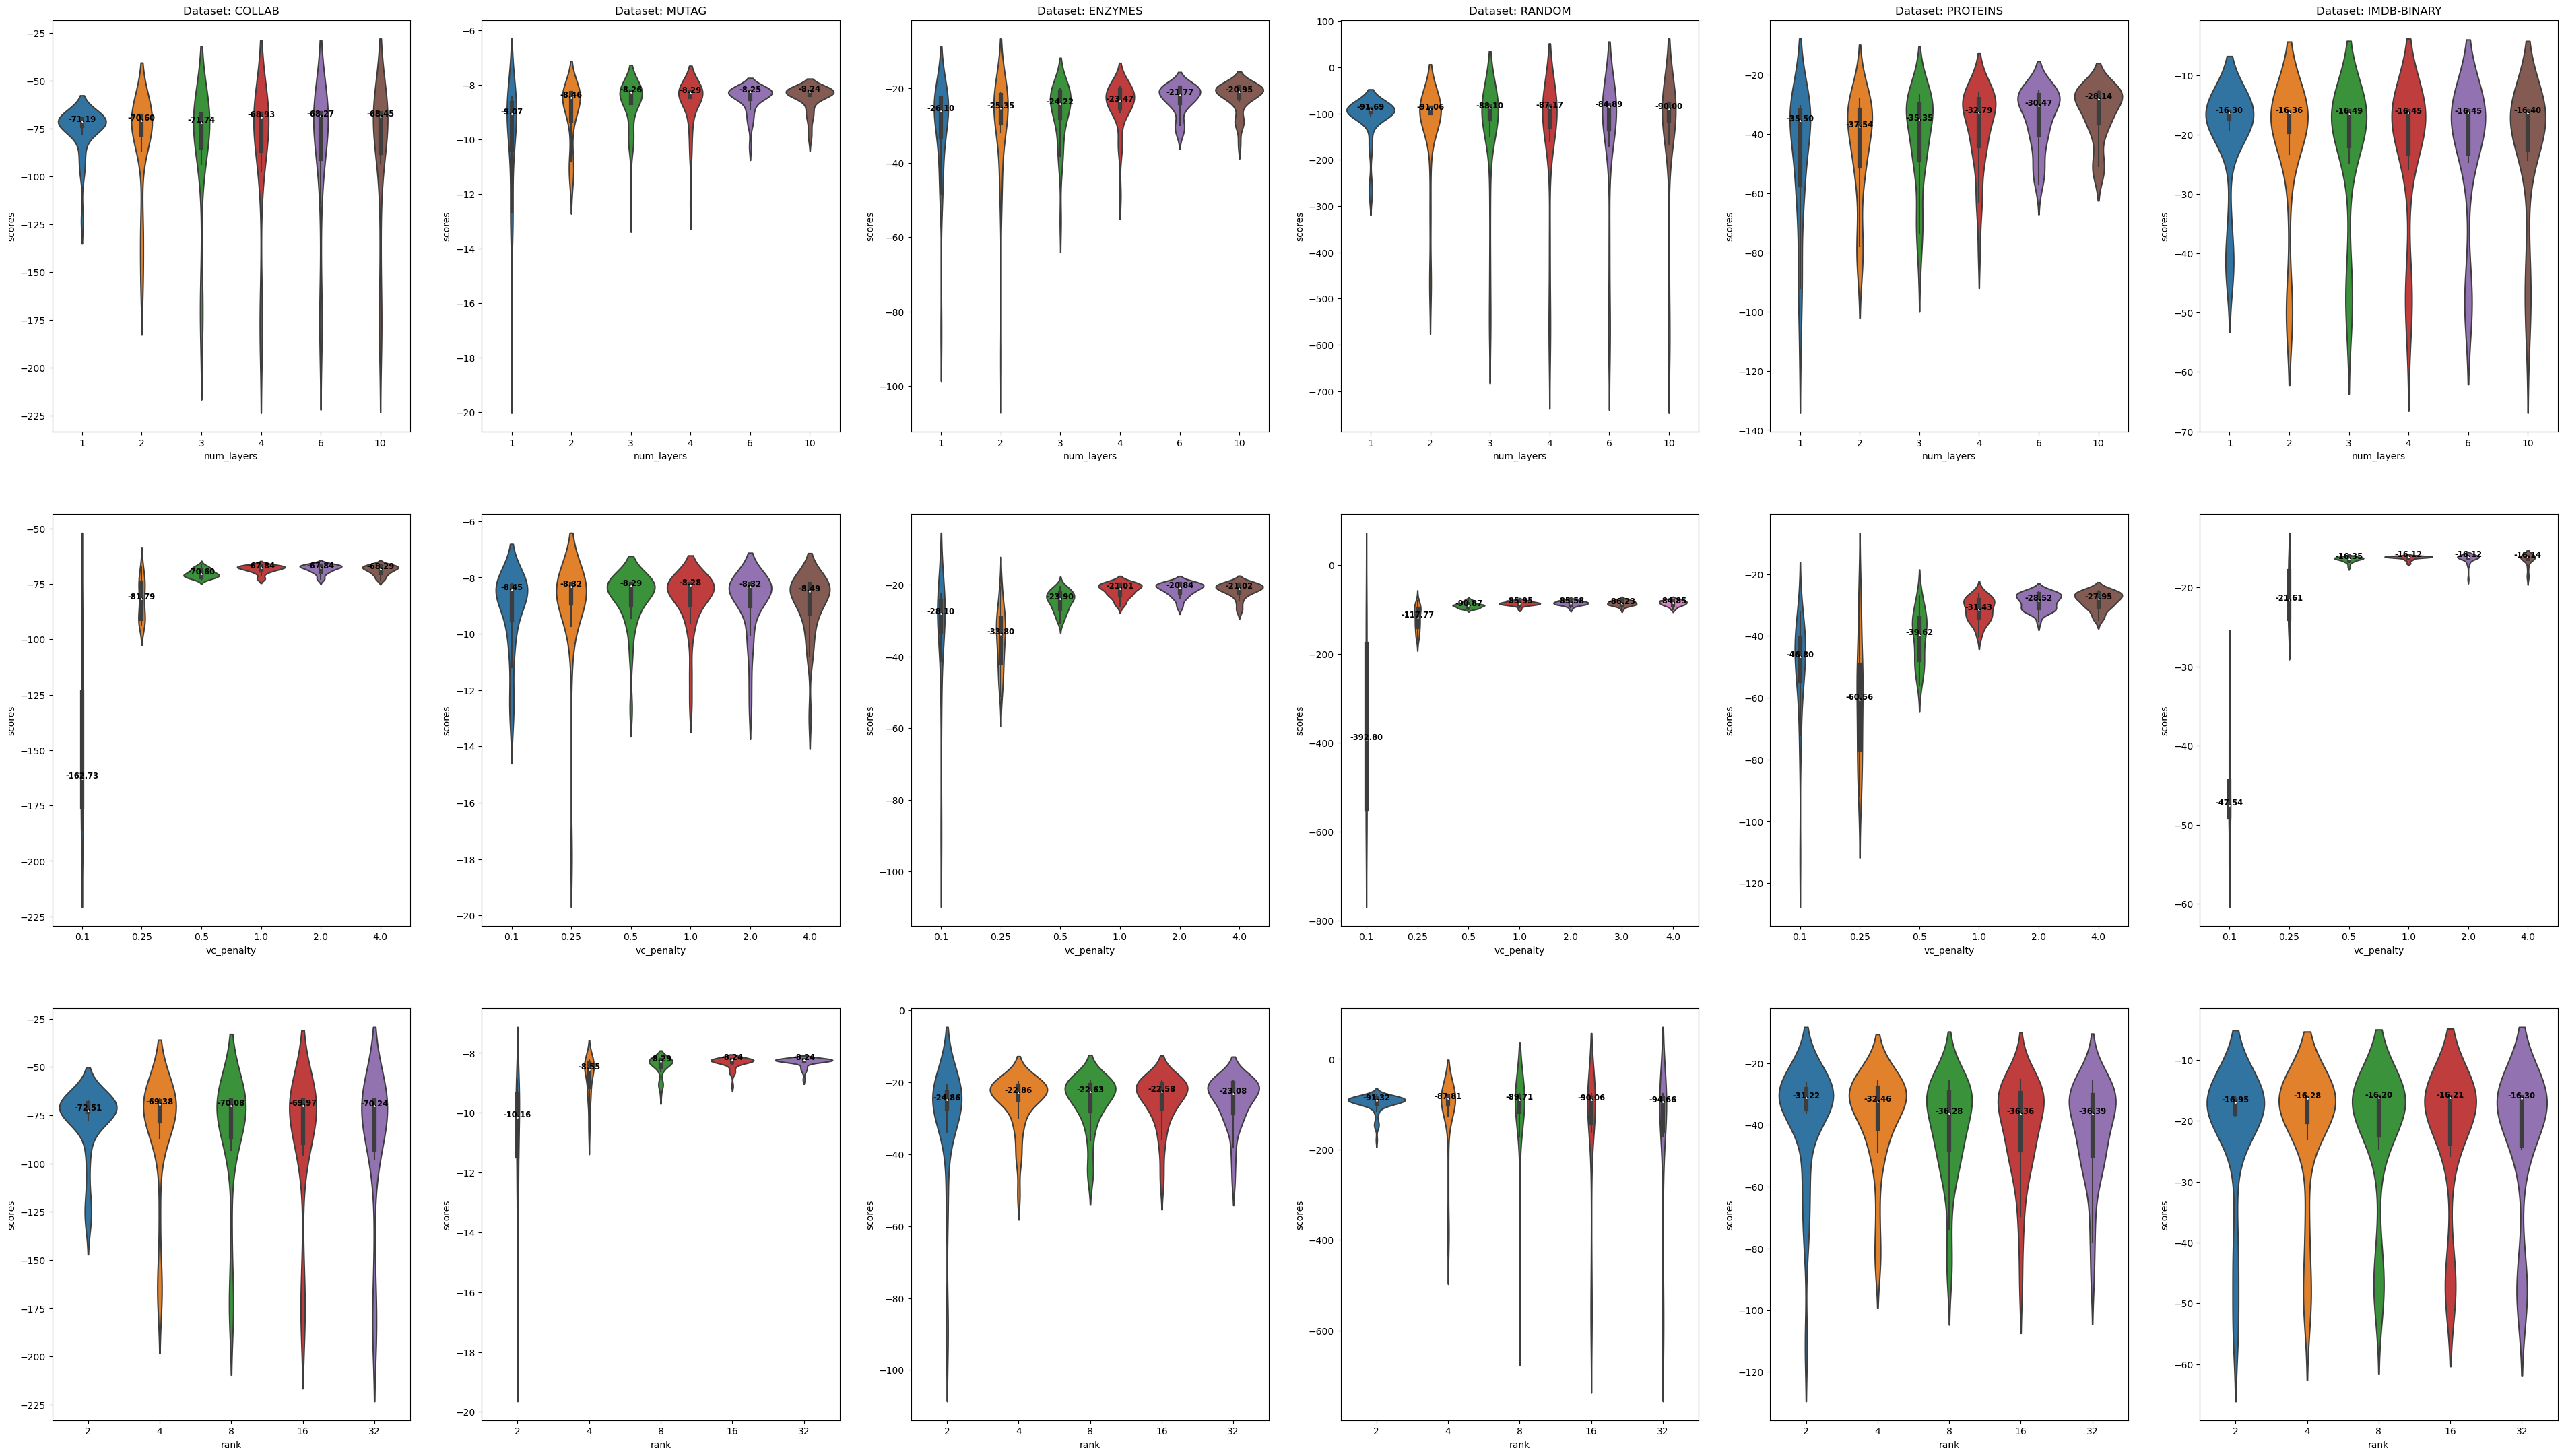

In [40]:
# hparams in rows
# datasets in colums
rows = [x for x in params if x!= "TUdataset_name"]
columns = set(df.TUdataset_name)
import matplotlib.pyplot as plt

fig, axs= plt.subplots(nrows=len(rows), ncols=len(columns), figsize=(48, 27))

for i, x in enumerate(columns):
    dfx = df[df.TUdataset_name == x]
    for j, y_name in enumerate(rows):
        ax = axs[j][i]
        x_vals = dfx[y_name]
        y_vals = dfx['scores']

        sns.violinplot(x=x_vals, y=y_vals, ax=ax)
        medians = dfx.groupby([y_name])['scores'].median()#
        try:
            median_dict = dict(zip([f'{float(x):0.2f}' for x in medians.keys()], medians.values))
        except:
            median_dict = dict(zip([x for x in medians.keys()], medians.values))
        pos = range(len(medians))
        for tick, label in enumerate(ax.get_xticklabels()):
            label = f'{float(label.get_text()):0.2f}'
            #print(median_dict)
            #if median_dict.get(label, None) is not None:
            ax.text(pos[tick], median_dict[label] + 0.01, f'{median_dict[label]:0.2f}',
                        horizontalalignment='center',
                        size='small',
                        color='k',
                        weight='semibold')
    
        if j == 0:
            ax.set(title=f"Dataset: {x}")

plt.show()

In [37]:
median_dict

{'0.10': -162.7285,
 '0.25': -81.79400000000001,
 '0.50': -70.5975,
 '1.00': -67.8355,
 '2.00': -67.8425,
 '4.00': -68.29249999999999}

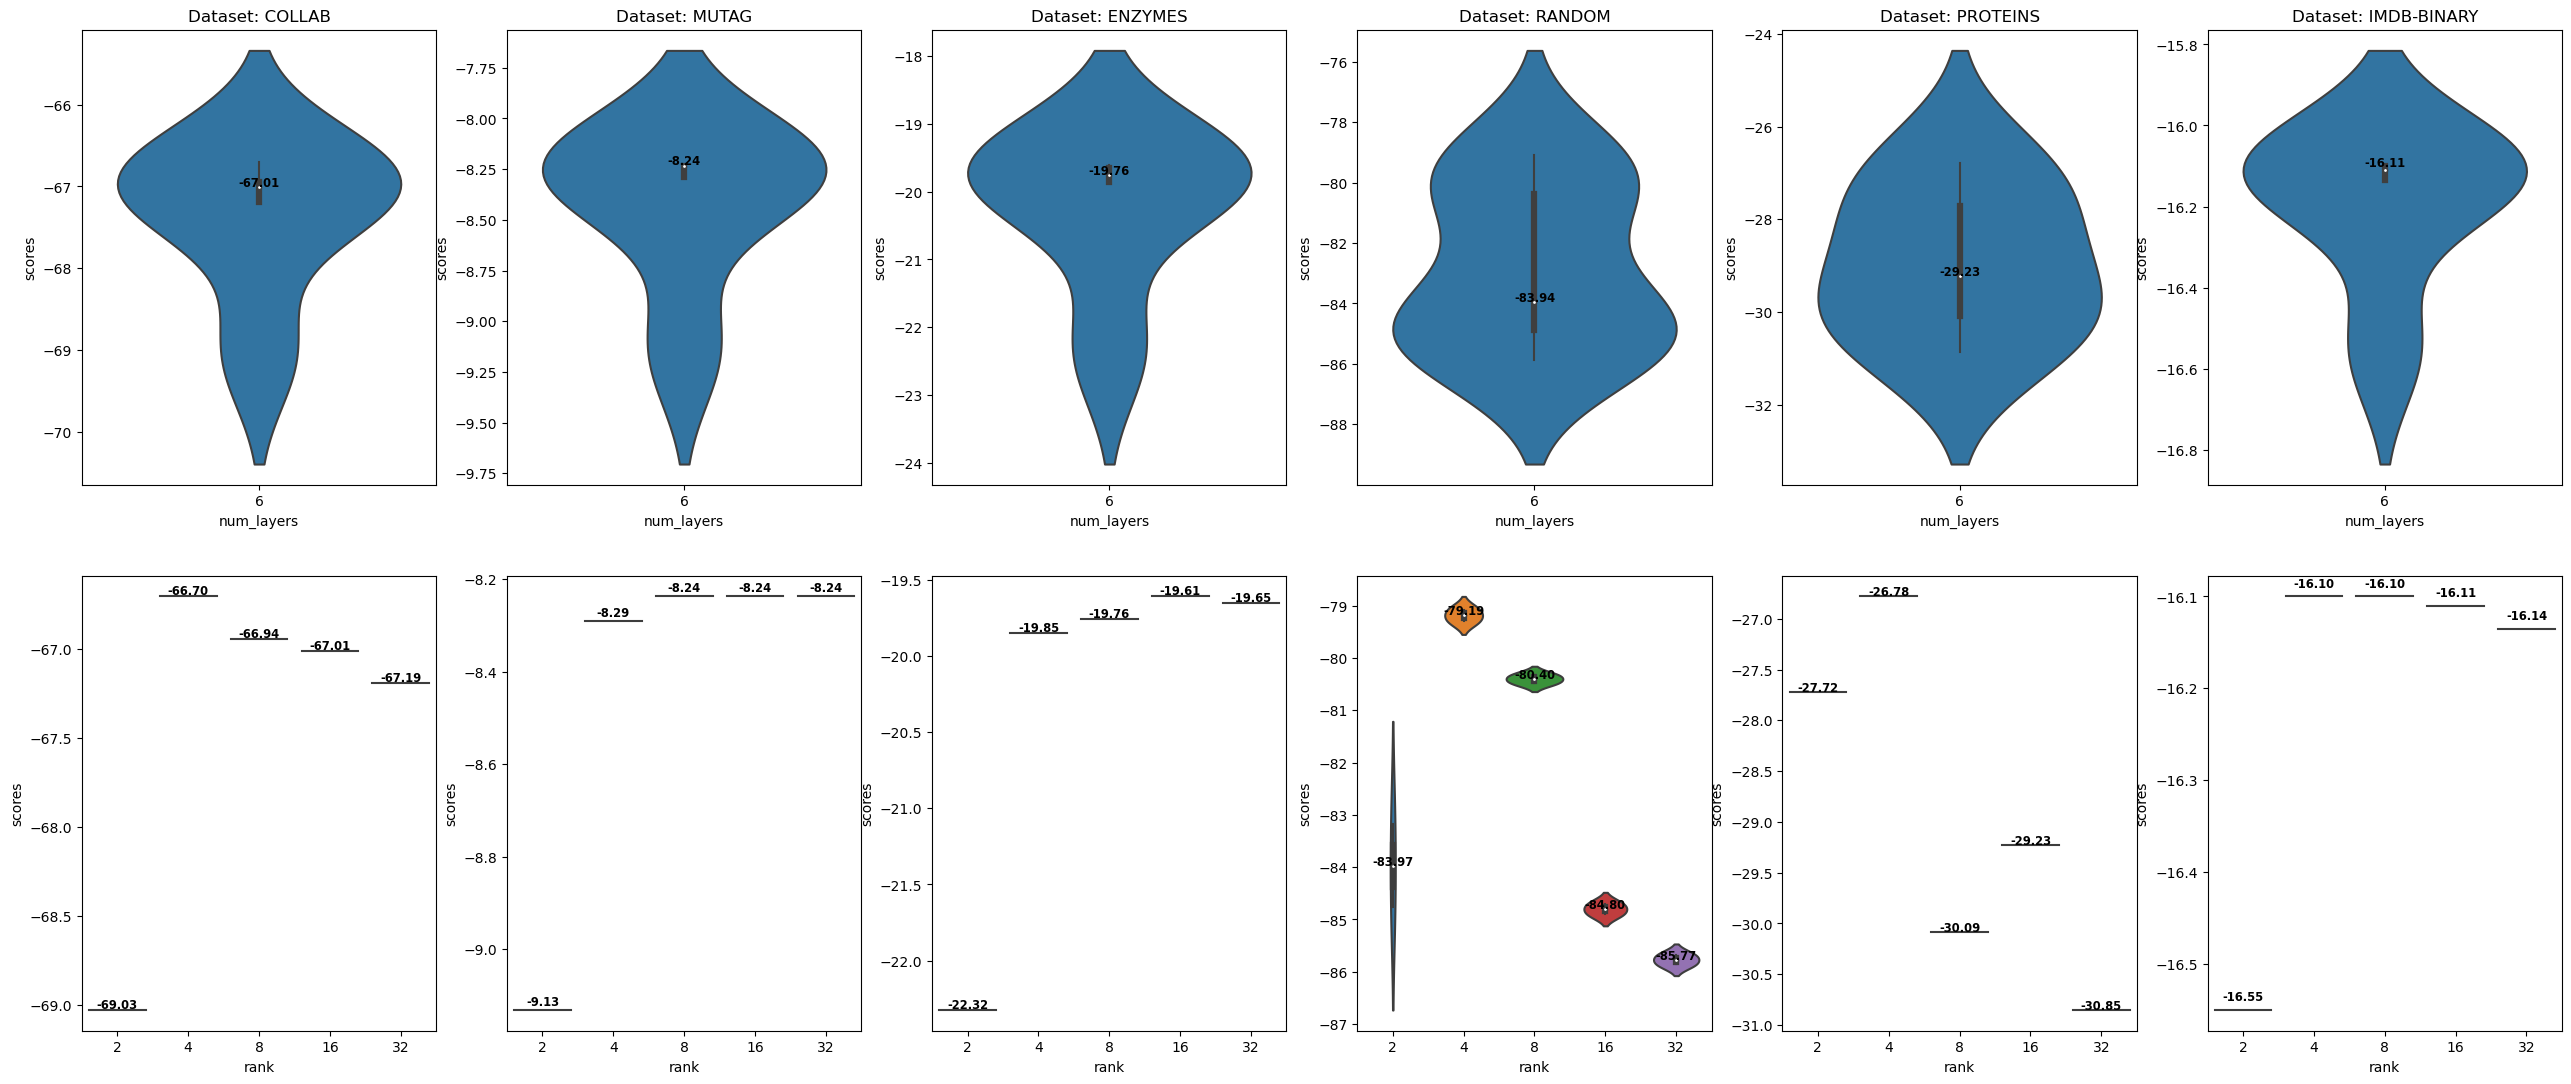

In [48]:
# hparams in rows
# datasets in colums
rows = [x for x in params if x not in ["TUdataset_name", 'vc_penalty',]]
columns = set(df.TUdataset_name)
import matplotlib.pyplot as plt
df1 = df[(df.vc_penalty == 1)& (df.num_layers == 6)]

fig, axs= plt.subplots(nrows=len(rows), ncols=len(columns), figsize=(32, 13))

for i, x in enumerate(columns):
    dfx = df1[df1.TUdataset_name == x]
    for j, y_name in enumerate(rows):
        ax = axs[j][i]
        x_vals = dfx[y_name]
        y_vals = dfx['scores']

        sns.violinplot(x=x_vals, y=y_vals, ax=ax)
        medians = dfx.groupby([y_name])['scores'].median()#
        try:
            median_dict = dict(zip([f'{float(x):0.2f}' for x in medians.keys()], medians.values))
        except:
            median_dict = dict(zip([x for x in medians.keys()], medians.values))
        pos = range(len(medians))
        for tick, label in enumerate(ax.get_xticklabels()):
            label = f'{float(label.get_text()):0.2f}'
            #print(median_dict)
            #if median_dict.get(label, None) is not None:
            ax.text(pos[tick], median_dict[label] + 0.01, f'{median_dict[label]:0.2f}',
                        horizontalalignment='center',
                        size='small',
                        color='k',
                        weight='semibold')
    
        if j == 0:
            ax.set(title=f"Dataset: {x}")

plt.show()

In [57]:
df.loc[df.groupby('TUdataset_name')['scores'].idxmax()]

,num_layers,TUdataset_name,vc_penalty,rank,scores
234,10,COLLAB,2.00,8,-66.506000
1200,10,ENZYMES,2.00,16,-19.466667
71,4,IMDB-BINARY,1.00,8,-16.090000
5,10,MUTAG,0.25,8,-8.236842
121,10,PROTEINS,4.00,16,-25.394619
1034,10,RANDOM,3.00,16,-77.275000
